In [1]:
import os
import glob
import pandas as pd

folder_path2 = "./400K"
folder_path4 = "./600K"

file_paths2 = glob.glob(os.path.join(folder_path2, "zaxis*"))
file_paths4 = glob.glob(os.path.join(folder_path4, "zaxis*"))

dfs2 = []
dfs4 = []

for file_path in file_paths2:
    df = pd.read_csv(file_path, skiprows=2, sep=' ', index_col=None, header=None)
    df.drop(int(0), axis=1, inplace=True)
    df.drop(int(2), axis=1, inplace=True)
    dfs2.append(df)

for file_path in file_paths4:
    df = pd.read_csv(file_path, skiprows=2, sep=' ', index_col=None, header=None)
    df.drop(int(0), axis=1, inplace=True)
    df.drop(int(2), axis=1, inplace=True)
    dfs4.append(df)

merged_df2 = pd.concat(dfs2, axis=1)
merged_df4 = pd.concat(dfs4, axis=1)


/var/folders/4j/67_xfsx14zqdm2qbdv5vgxgw0000gn/T/ipykernel_20888/2763739533.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


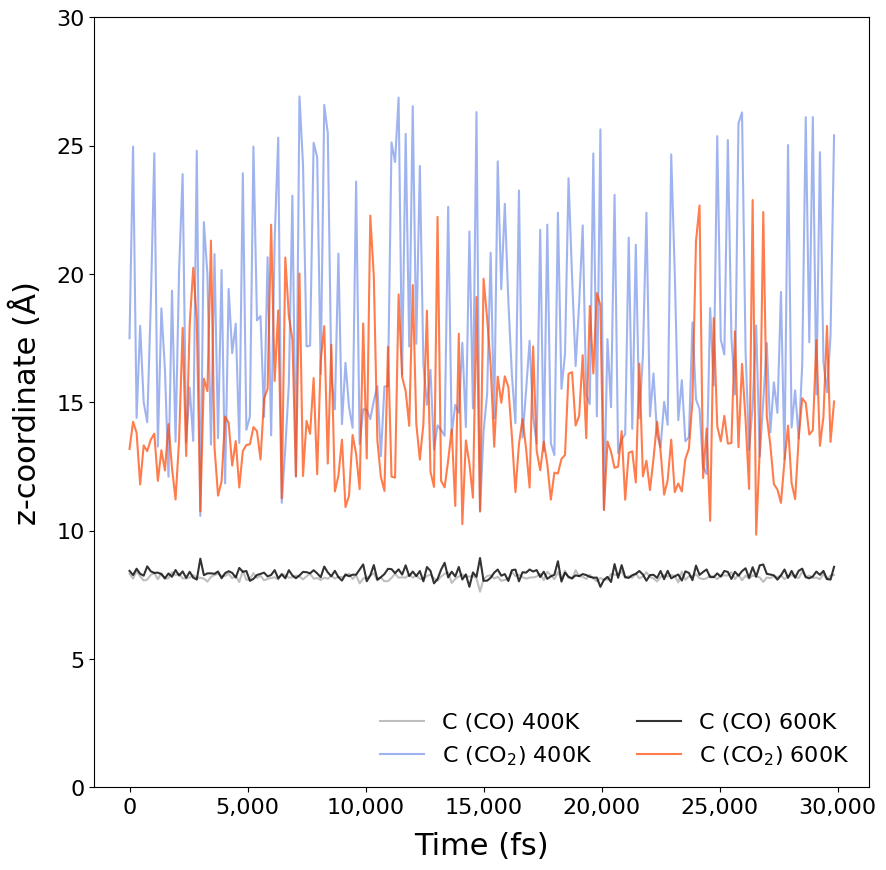

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
ax = plt.gca()

numbers_list = [i for i in range(1, 30001, 150)]

c_co_400 = (merged_df2.iloc[36] + merged_df2.iloc[38])/2
c_co2_400 = merged_df2.iloc[37]

c_co_600 = (merged_df4.iloc[36] + merged_df4.iloc[38])/2
c_co2_600 = merged_df4.iloc[37]

plt.plot(numbers_list, c_co_400, c="gray", alpha=0.5, label=r'C (CO) 400K')
plt.plot(numbers_list, c_co2_400, c="royalblue", alpha=0.5, label=r'C (CO$_2$) 400K')

plt.plot(numbers_list, c_co_600, c="black", alpha=0.8, label=r'C (CO) 600K')
plt.plot(numbers_list, c_co2_600, c="orangered", alpha=0.7, label=r'C (CO$_2$) 600K')

current_values = plt.gca().get_xticks()
ax.set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.xlabel('Time (fs)', size=22, labelpad=10)
#plt.xlim(0,1.0)
plt.ylabel('z-coordinate (Å)', size=22, labelpad=10)
plt.ylim(0, 30000)
plt.ylim(0, 30)
plt.yticks(size=16)
plt.xticks(size=16)
plt.legend(loc=4, ncol=2, fontsize=16, frameon=False)
plt.show()
